# Principal Component Analysis (PCA) - Hands-On Notebook

---

## Objective
In this notebook, we will learn **Principal Component Analysis (PCA)** for dimensionality reduction.  
We will cover:

1. What PCA is and why it's useful  
2. How PCA works mathematically  
3. Hands-on implementation using Python (`scikit-learn`)  
4. Visualizing PCA components  
5. Applying PCA to a real dataset

---

## What is PCA?

**Principal Component Analysis (PCA)** is a technique used to reduce the dimensionality of datasets while retaining as much variability as possible.  

- It transforms the original features into a new set of **uncorrelated variables** called **principal components**  
- The first principal component captures the **maximum variance**  
- Subsequent components capture the remaining variance while being orthogonal to previous components  

**Why use PCA?**
- Reduce computational complexity  
- Remove multicollinearity  
- Visualize high-dimensional data  
- Improve performance of ML models  

---

## How PCA Works

Mathematically, PCA involves:

1. **Standardizing the data**  
   - Mean centering and scaling features to unit variance

2. **Computing the covariance matrix**  
   \[
   $ \text{Cov}(X) = \frac{1}{n-1} X^T X $
   \]

3. **Computing eigenvalues and eigenvectors**  
   - Eigenvectors define the directions of the new feature space  
   - Eigenvalues determine the magnitude (variance explained)  

4. **Selecting top k components**  
   - Sort eigenvectors by eigenvalues  
   - Choose top k to reduce dimensions  

5. **Projecting data** onto principal components  

---

## Step 1: Import Libraries


In [1]:
# Data manipulation
import numpy as np
import pandas as pd

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Standard Scaler & PCA
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Dataset
from sklearn.datasets import load_iris

# Ignore warnings
import warnings
warnings.filterwarnings('ignore')


## Step 2: Load Dataset

We'll use the Iris dataset for demonstration.

In [2]:
# Load Iris dataset
iris = load_iris()
X = iris.data
y = iris.target
feature_names = iris.feature_names

# Convert to DataFrame
df = pd.DataFrame(X, columns=feature_names)
df['target'] = y
df.head()


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


## Step 3: Standardize the Data

PCA is affected by the scale of features. Standardization ensures each feature has mean=0 and variance=1.

In [3]:
# Separate features
X_features = df.iloc[:, :-1]

# Standardize
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_features)

# Check mean and variance
print("Mean of standardized data:\n", X_scaled.mean(axis=0))
print("Variance of standardized data:\n", X_scaled.var(axis=0))


Mean of standardized data:
 [-1.69031455e-15 -1.84297022e-15 -1.69864123e-15 -1.40924309e-15]
Variance of standardized data:
 [1. 1. 1. 1.]


## Step 4: Apply PCA

We will reduce 4-dimensional data to 2 dimensions for visualization.

In [4]:
# Apply PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Convert to DataFrame
df_pca = pd.DataFrame(X_pca, columns=['PC1', 'PC2'])
df_pca['target'] = y
df_pca.head()


,PC1,PC2,target
0,-2.264703,0.480027,0
1,-2.080961,-0.674134,0
2,-2.364229,-0.341908,0
3,-2.299384,-0.597395,0
4,-2.389842,0.646835,0


## Step 5: Explained Variance

The explained variance ratio tells how much information each principal component holds.

In [5]:
print("Explained Variance Ratio:", pca.explained_variance_ratio_)
print("Total Variance Captured:", sum(pca.explained_variance_ratio_))


Explained Variance Ratio: [0.72962445 0.22850762]
Total Variance Captured: 0.9581320720000164


## Step 6: Visualize PCA

We'll plot the first two principal components.

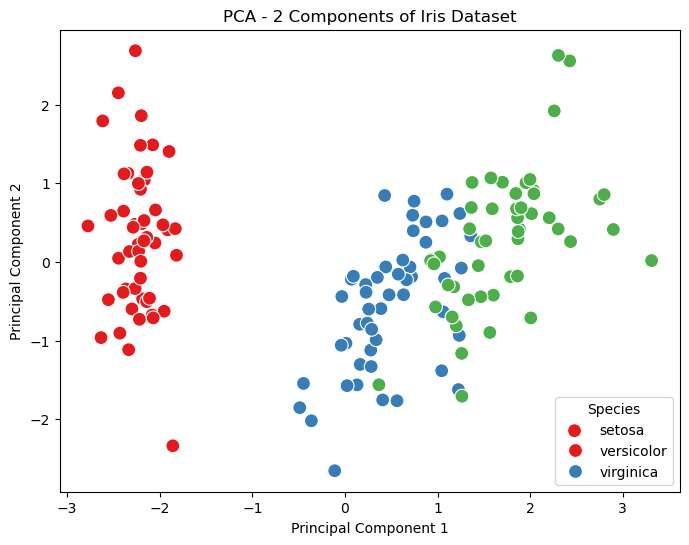

In [6]:
plt.figure(figsize=(8,6))
sns.scatterplot(data=df_pca, x='PC1', y='PC2', hue='target', palette='Set1', s=100)
plt.title('PCA - 2 Components of Iris Dataset')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Species', labels=iris.target_names)
plt.show()


## Step 7: Optional - Cumulative Variance

Check how many components are required to retain 95% variance.

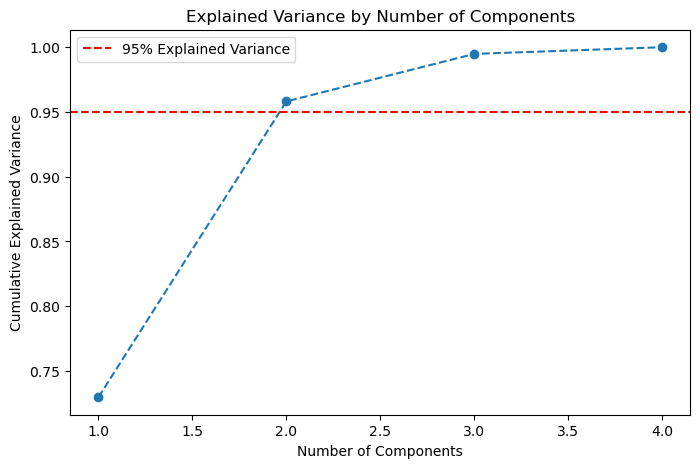

In [7]:
# Apply PCA to all features
pca_full = PCA()
pca_full.fit(X_scaled)

# Cumulative explained variance
cum_var = np.cumsum(pca_full.explained_variance_ratio_)
plt.figure(figsize=(8,5))
plt.plot(range(1,len(cum_var)+1), cum_var, marker='o', linestyle='--')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Explained Variance by Number of Components')
plt.axhline(y=0.95, color='r', linestyle='--', label='95% Explained Variance')
plt.legend()
plt.show()


## Step 8: Summary
- PCA reduces dimensionality while preserving variance
- Standardization is essential before PCA
- The first few principal components often capture most of the variance
  
PCA is widely used for:
- Visualization of high-dimensional data
- Preprocessing before ML models
- Noise reduction
  
## Next Steps
- Apply PCA to datasets like Wine, Digits, or MNIST
- Combine PCA with clustering (K-Means) for dimensionality reduction + visualization
- Explore Kernel PCA for non-linear data